# Import

In [1]:
import os
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# 시각화 스타일 설정
plt.style.use('ggplot')
sns.set_palette("husl")
# 한글 깨짐 방지 (리눅스 환경 기준)
plt.rc('font', family='NanumBarunGothic') 
plt.rcParams['axes.unicode_minus'] = False

print("✅ 라이브러리 로드 완료")

✅ 라이브러리 로드 완료


# Data processing

In [2]:
# 1. 파일 경로 설정
DATA_PATH = '/home/ktg0310/projects/ml_project/AI-dectector/data/processed/combined_ai_human_data.json'

# 2. 데이터 불러오기
with open(DATA_PATH, 'r', encoding='utf-8') as f:
    data = json.load(f)

df = pd.DataFrame(data)

# 3. 데이터 필터링 (human, llama3만 사용)
# 이미 해당 데이터만 들어있겠지만, 확실히 하기 위해 한 번 더 필터링합니다.
df = df[df['source'].isin(['human', 'llama3'])].copy()

# 4. 텍스트 정제 (AI 서두 제거)
def clean_ai_metadata(text):
    # Llama 3가 자주 붙이는 서두 구문들 제거
    prefixes = [
        "Here is a logical Korean essay",
        "Here is a logical essay",
        "Title:", 
        "---"
    ]
    cleaned = text
    for p in prefixes:
        if p in cleaned[:50]: # 문서 앞부분에 해당 단어가 있으면
            cleaned = cleaned.split('\n\n', 1)[-1] # 첫 번째 문단 구분 이후부터 취함
    return cleaned.strip()

df['text'] = df['text'].apply(clean_ai_metadata)

# 5. 분석을 위한 글자 수 계산
df['text_len'] = df['text'].apply(len)

print(f"✅ 데이터 로드 완료: 총 {len(df)}건")
df.head()

✅ 데이터 로드 완료: 총 200건


,text,label,source,text_len
0,세 가수의 버전이 모두 크게 히트했지만 곡은 조금씩 느낌이 다르다.\n키스 휘틀리가...,0,human,726
1,"키스 휘틀리의 오리지널 곡을 듣는 것은, 음악의 세계에서 새로운 발견을 할 수 있는...",1,llama3,912
2,물론 일반 대중과 평단의 반응이 서로 엇갈리는 것은 그리 드문 일은 아니다. 그런데...,0,human,776
3,"**미국 영화의 세계적 인정받는 가치**\n\n최근 미국 영화 종합사이트에 따르면,...",1,llama3,1019
4,"김유신의 처음 기획은 먼저 누이동생 보희를 김춘추와 맺어주기로 했는데, 막내 누이동...",0,human,928


In [3]:
import os
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# 폰트 에러 해결을 위한 설정
import matplotlib.font_manager as fm

# 한글 폰트가 없을 경우를 대비해 영문으로 라벨을 자동 변환하거나 
# 시스템 기본 폰트를 사용하도록 설정
plt.rcParams['axes.unicode_minus'] = False
sns.set(style="whitegrid")

# 만약 한글을 꼭 보고 싶다면 서버에 폰트를 설치해야 하지만, 
# 귀찮으시다면 아래 시각화 코드에서 라벨만 영어로 바꿔주는 게 제일 빠릅니다.
print("✅ 라이브러리 로드 완료 (폰트 설정 업데이트)")

✅ 라이브러리 로드 완료 (폰트 설정 업데이트)


/tmp/ipykernel_19640/2609363811.py:16: UserWarning: Glyph 45936 (\N{HANGUL SYLLABLE DE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_19640/2609363811.py:16: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_19640/2609363811.py:16: UserWarning: Glyph 53552 (\N{HANGUL SYLLABLE TEO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_19640/2609363811.py:16: UserWarning: Glyph 49548 (\N{HANGUL SYLLABLE SO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_19640/2609363811.py:16: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_19640/2609363811.py:16: UserWarning: Glyph 44060 (\N{HANGUL SYLLABLE GAE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_19640/2609363811.py:16: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  plt.tight

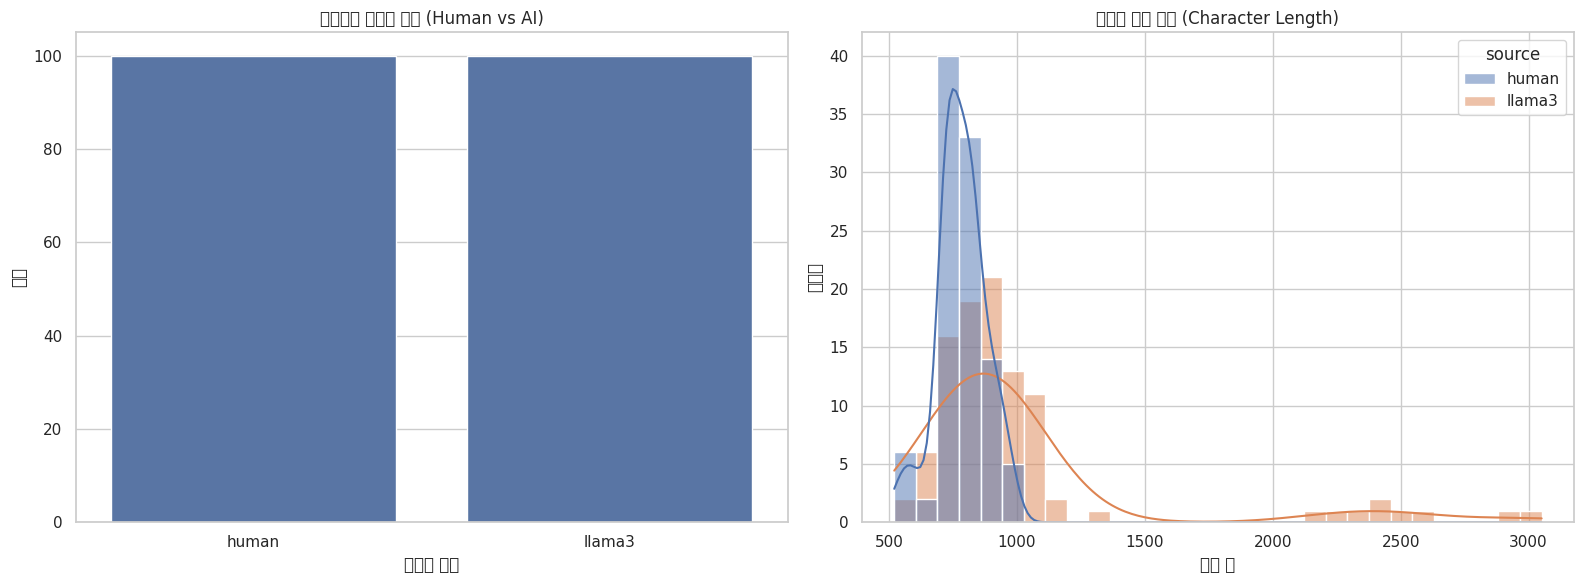

📊 데이터 통계:
        count     mean         std    min    25%    50%      75%     max
source                                                                  
human   100.0   783.04   94.000099  521.0  727.0  785.0   835.00   988.0
llama3  100.0  1019.83  498.615478  548.0  781.5  885.0  1019.25  3051.0


In [4]:
# 시각화 영역 생성
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# 1. 클래스 분포 (Human vs AI)
sns.countplot(x='source', data=df, ax=axes[0])
axes[0].set_title('클래스별 데이터 개수 (Human vs AI)')
axes[0].set_xlabel('데이터 소스')
axes[0].set_ylabel('개수')

# 2. 텍스트 길이 분포
sns.histplot(data=df, x='text_len', hue='source', kde=True, ax=axes[1], bins=30)
axes[1].set_title('텍스트 길이 분포 (Character Length)')
axes[1].set_xlabel('글자 수')
axes[1].set_ylabel('빈도수')

plt.tight_layout()
plt.show()

# 상세 수치 출력
print("📊 데이터 통계:")
print(df.groupby('source')['text_len'].describe())

In [5]:
# Label 설정 (human=0, llama3=1)
# 이미 json 생성 시 label이 설정되어 있을 것이므로 확인 후 필요시 재설정
# df['label'] = df['source'].apply(lambda x: 0 if x == 'human' else 1)

# 데이터 분할 (8:1:1 비율)
# 1. Train(80%)과 나머지(20%)로 분할
train_df, tmp_df = train_test_split(df, test_size=0.2, random_state=42, stratify=df['label'])

# 2. 나머지(20%)를 다시 Validation(10%)과 Test(10%)로 분할
val_df, test_df = train_test_split(tmp_df, test_size=0.5, random_state=42, stratify=tmp_df['label'])

print(f"✅ 데이터 분할 완료")
print(f"   - 학습 데이터(Train): {len(train_df)}건")
print(f"   - 검증 데이터(Val): {len(val_df)}건")
print(f"   - 테스트 데이터(Test): {len(test_df)}건")

# 중간 결과 저장 (CSV 형태)
train_df.to_csv('train_data.csv', index=False)
val_df.to_csv('val_data.csv', index=False)
test_df.to_csv('test_data.csv', index=False)

✅ 데이터 분할 완료
   - 학습 데이터(Train): 160건
   - 검증 데이터(Val): 20건
   - 테스트 데이터(Test): 20건


# Import model (KoBART)

In [ ]:
""" from transformers import BartForSequenceClassification, PreTrainedTokenizerFast

# 논문에서 사용한 KoBART 모델 로드
# 분류를 위해 SequenceClassification용 모델을 불러옵니다.
model_name = "digit82/kobart-summarization" # 기초 모델
tokenizer = PreTrainedTokenizerFast.from_pretrained(model_name)
model = BartForSequenceClassification.from_pretrained(model_name, num_labels=2)

print("✅ KoBART 모델 및 토크나이저 로드 완료") """

/home/ktg0310/.pyenv/versions/3.10.13/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
You passed `num_labels=3` which is incompatible to the `id2label` map of length `2`.
Loading weights: 100%|██████████| 261/261 [00:00<00:00, 1052.55it/s, Materializing param=model.shared.weight]                                  
The tied weights mapping and config for this model specifies to tie model.shared.weight to model.decoder.embed_tokens.weight, but both are present in the checkpoints, so we will NOT tie them. You should update the config with `tie_word_embeddings=False` to silence this warning
The tied weights mapping and config for this model specifies to tie model.shared.weight to model.encoder.embed_tokens.weight, but both are present in the checkpoints, so we will NOT tie them. You should update the config 

✅ KoBART 모델 및 토크나이저 로드 완료


데이터셋 객체 생성 및 토크나이징

In [ ]:
""" from datasets import Dataset

# Pandas DataFrame을 Hugging Face Dataset으로 변환
train_dataset = Dataset.from_pandas(train_df[['text', 'label']])
val_dataset = Dataset.from_pandas(val_df[['text', 'label']])

def tokenize_function(examples):
    # 논문에서 긴 글 처리를 위해 사용한 방식 참고 (최대 길이 512)
    return tokenizer(examples["text"], padding="max_length", truncation=True, max_length=512)

# 토크나이징 적용
tokenized_train = train_dataset.map(tokenize_function, batched=True)
tokenized_val = val_dataset.map(tokenize_function, batched=True)

print("✅ 토크나이징 완료") """

Map: 100%|██████████| 20/20 [00:00<00:00, 3546.08 examples/s]

✅ 토크나이징 완료


에러나서 모델 로드 및 재 토크나이징

In [12]:
from transformers import BartForSequenceClassification, PreTrainedTokenizerFast, BartConfig
from datasets import Dataset

# 1. 모델 및 토크나이저 초기화
model_name = "digit82/kobart-summarization"
tokenizer = PreTrainedTokenizerFast.from_pretrained(model_name)

# 특수 토큰을 명확히 정의 (KoBART 표준)
tokenizer.eos_token = '</s>'
tokenizer.bos_token = '<s>'
tokenizer.pad_token = '<pad>'

# 2. 모델 설정 (num_labels 오류 및 인덱스 참조 오류 해결)
config = BartConfig.from_pretrained(model_name)
config.num_labels = 2
config.id2label = {0: "HUMAN", 1: "AI"}
config.label2id = {"HUMAN": 0, "AI": 1}

# 중요: 모델이 분류 시 참조할 EOS 토큰 ID를 강제로 주입
config.eos_token_id = tokenizer.eos_token_id
config.pad_token_id = tokenizer.pad_token_id
config.forced_eos_token_id = tokenizer.eos_token_id

# 3. 모델 로드
model = BartForSequenceClassification.from_pretrained(model_name, config=config)

# 4. 토크나이징 함수 수정 (return_tensors 없이 매핑 시 필요한 설정만 유지)
def tokenize_function(examples):
    return tokenizer(
        examples["text"], 
        padding="max_length", 
        truncation=True, 
        max_length=512,
        add_special_tokens=True # <s>와 </s>를 자동으로 붙여줍니다.
    )

# 5. 데이터셋 생성 및 매핑
train_dataset = Dataset.from_pandas(train_df[['text', 'label']])
val_dataset = Dataset.from_pandas(val_df[['text', 'label']])

tokenized_train = train_dataset.map(tokenize_function, batched=True)
tokenized_val = val_dataset.map(tokenize_function, batched=True)

# 6. 모델에 토크나이저 정보 재확인 (학습 직전 최종 확인)
model.resize_token_embeddings(len(tokenizer))

print(f"✅ 최종 확인 - 레이블 개수: {model.config.num_labels}")
print(f"✅ 최종 확인 - EOS 토큰 ID: {model.config.eos_token_id}")

You passed `num_labels=3` which is incompatible to the `id2label` map of length `2`.
Loading weights: 100%|██████████| 261/261 [00:00<00:00, 1022.99it/s, Materializing param=model.shared.weight]                                  
The tied weights mapping and config for this model specifies to tie model.shared.weight to model.decoder.embed_tokens.weight, but both are present in the checkpoints, so we will NOT tie them. You should update the config with `tie_word_embeddings=False` to silence this warning
The tied weights mapping and config for this model specifies to tie model.shared.weight to model.encoder.embed_tokens.weight, but both are present in the checkpoints, so we will NOT tie them. You should update the config with `tie_word_embeddings=False` to silence this warning
BartForSequenceClassification LOAD REPORT from: digit82/kobart-summarization
Key                                 | Status     | 
------------------------------------+------------+-
final_logits_bias                 

✅ 최종 확인 - 레이블 개수: 2
✅ 최종 확인 - EOS 토큰 ID: 1


# Train

In [ ]:
from transformers import TrainingArguments, Trainer, DataCollatorWithPadding
import numpy as np
import evaluate 

# 1. 평가 지표 정의 (Accuracy)
metric = evaluate.load("accuracy")

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return metric.compute(predictions=predictions, references=labels)

# 2. 데이터 콜레이터 (패딩 자동 처리 - 여기에 이미 토크나이저가 포함됨)
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

# 3. 학습 인자 설정 (논문 기반 가이드 및 최신 버전 대응)
training_args = TrainingArguments(
    output_dir="./results",          # 모델 저장 경로 
    num_train_epochs=2,              # 논문 권장 에포크 [cite: 12, 44]
    per_device_train_batch_size=2,   # 배치 사이즈
    gradient_accumulation_steps=4,   # 메모리 절약을 위해 배치 사이즈 줄이고 이 코드 추가(실제 배치는 8) 
    per_device_eval_batch_size=8,    # 평가 배치 사이즈 
    warmup_steps=100,                # 학습 초기 안정화 단계
    weight_decay=0.01,               # 가중치 감쇠 (과적합 방지)
    fp16=True,                       # 메모리 사용량 감소
    eval_strategy="epoch",           # 에포크마다 평가 진행 [cite: 44, 50]
    save_strategy="epoch",           # 에포크마다 저장 
    load_best_model_at_end=True,     # 가장 성능 좋은 모델 로드
    report_to="none",                # tensorboard 관련 경고 방지를 위해 우선 none 설정
)

# 4. Trainer 객체 생성 (tokenizer 인자명을 processing_class로 변경하거나 생략)
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_train,
    eval_dataset=tokenized_val,
    data_collator=data_collator,
    compute_metrics=compute_metrics,
    # 최신 버전에서는 tokenizer 인자 대신 processing_class를 쓰거나 data_collator로 대체합니다.
)

print("✅ 학습 준비 완료 (Trainer 인자 및 경고 해결)")

OutOfMemoryError: CUDA out of memory. Tried to allocate 20.00 MiB. GPU 0 has a total capacity of 7.62 GiB of which 8.44 MiB is free. Including non-PyTorch memory, this process has 7.54 GiB memory in use. Of the allocated memory 7.28 GiB is allocated by PyTorch, and 151.39 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

: 

In [11]:
# 모델 학습 시작
print("🚀 KoBART 학습을 시작합니다...")
trainer.train()

# 최종 평가
print("\n📊 최종 검증 데이터 평가 결과:")
eval_results = trainer.evaluate()
print(eval_results)

🚀 KoBART 학습을 시작합니다...


IndexError: index -1 is out of bounds for dimension 1 with size 0